In [1]:
import pandas as pd
import numpy as np
import time
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from lifelines import WeibullAFTFitter
from lifelines.utils import k_fold_cross_validation
import pickle


In [2]:
with open('/home/arash/ProjectVR/cleaneddata/deepwaitdata/nctrain', 'rb') as f:
    NCtrain=pickle.load(f)

with open('/home/arash/ProjectVR/cleaneddata/deepwaitdata/nctest', 'rb') as f:
    NCtest=pickle.load(f)

In [3]:
NCtrain.head()

,walktoshop,numcars_morethan1,mode_Car,normarrival,over50,normdens,Age_18 - 29,Snowy,Gender_Female,One way,...,Age_30 - 39,FullAV,normlanewidth,Night,walktowork,normmingap,Two way with median,numcars_0,E,Wait Time (s)
2856,1,0,0,0.385965,1,0.552430,0,0.0,0,0.0,...,0,1,1.0,0.0,0,0.0,0.0,0,1,0.69934
2161,0,1,1,0.385965,0,0.168798,0,0.0,1,0.0,...,1,1,0.0,0.0,0,1.0,1.0,0,1,14.42615
1711,0,0,0,0.000000,0,0.271100,1,0.0,1,0.0,...,0,1,0.0,1.0,1,0.0,1.0,0,1,0.00000
678,1,0,0,0.000000,0,0.101662,0,0.0,0,0.0,...,1,1,1.0,1.0,1,0.5,0.0,1,1,9.86871
1689,1,0,0,0.000000,0,0.271100,1,0.0,0,1.0,...,0,1,0.0,0.0,1,0.0,0.0,1,1,0.00000


In [4]:
cph = CoxPHFitter()
cph.fit(NCtrain, 'Wait Time (s)', event_col='E')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1832 observations, 0 censored>
      duration col = 'Wait Time (s)'
         event col = 'E'
number of subjects = 1832
  number of events = 1832
    log-likelihood = -11806.87
  time fit was run = 2019-11-25 18:15:45 UTC

---
                     coef  exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
walktoshop           0.21       1.24      0.06  3.48 <0.005     10.97        0.09        0.33
numcars_morethan1    0.01       1.01      0.06  0.24   0.81      0.30       -0.10        0.13
mode_Car            -0.22       0.80      0.06 -3.70 <0.005     12.17       -0.34       -0.11
normarrival         -0.15       0.86      0.10 -1.60   0.11      3.18       -0.34        0.03
over50              -0.34       0.71      0.12 -2.75   0.01      7.38       -0.59       -0.10
normdens            -0.64       0.53      0.14 -4.50 <0.005     17.16       -0.91       -0.36
Age_18 - 29         -0.12       0.89      0.10 -1.21   0.23      2.13       -0.3

In [5]:
prediction = pd.DataFrame(cph.predict_expectation(NCtrain))
prediction.columns=['Wait Time (s)']
AVG = pd.DataFrame(NCtrain['Wait Time (s)']).mean()
print (AVG)

Wait Time (s)    5.810319
dtype: float64


In [27]:
print(prediction.mean())

Wait Time (s)    5.773069
dtype: float64


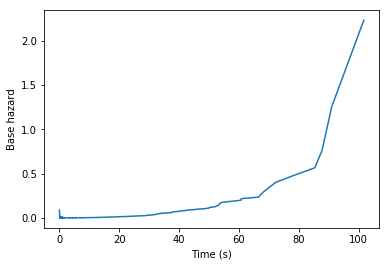

In [7]:
plt.xlabel('Time (s)')
plt.ylabel('Base hazard')
plt.plot(NCtrain.sort_values(by=['Wait Time (s)'])['Wait Time (s)'].unique(),cph.baseline_hazard_.values)
plt.show()

In [8]:
diff = abs(prediction-pd.DataFrame(NCtrain['Wait Time (s)'])).mean()
#mean difference between predicted and actual wait time 
print (diff)

Wait Time (s)    5.216859
dtype: float64


In [143]:
RMSE = np.sqrt(np.mean((prediction-pd.DataFrame(NCtrain['Wait Time (s)']))**2))
print (RMSE)

Wait Time (s)    8.567824
dtype: float64


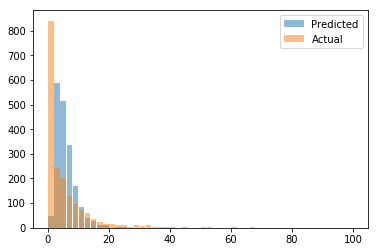

In [145]:
plt.hist(prediction.values, alpha=0.5, bins = 50, rwidth=0.9, range = (0,100), label='Predicted')
plt.hist(NCtrain['Wait Time (s)'], alpha=0.5, bins = 50, rwidth=0.9, range = (0,100),  label='Actual')
plt.legend(loc='upper right')

In [ ]:
prediction = pd.DataFrame(cph.predict_expectation(NCtest))
prediction.columns=['Wait Time (s)']
RSS = np.linalg.norm(prediction-pd.DataFrame(NCtest['Wait Time (s)']))**2   #residual sum of squares
AVG = pd.DataFrame(NCtest['Wait Time (s)']).mean()
TSS = np.linalg.norm(pd.DataFrame(NCtest['Wait Time (s)'])-AVG)**2         #Total sum of square

R2 = 1-RSS/TSS                       #R squared

R2

In [ ]:
data=data.drop(columns=['Minimum Gap','Night','dizziness_Over the years','Headaches_Currently','Headaches_Over the years','Heart_Over the years','FullAV'
                       ],axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(data, 'Wait Time (s)', event_col='E')
cph.print_summary()

In [ ]:
cph.baseline_hazard_

In [ ]:
data=data.drop(columns=['Snowy','numcars','Occupation_Unemployed','workwalk_Sometimes','shopwalk_Sometimes',
                        'Education_Professional degree','Education_College/University student',
                        'mode_Car','anxiety_Currently','anxiety_Over the years'],axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(data, 'Wait Time (s)', event_col='E')
cph.print_summary()

In [ ]:
data=data.drop(columns=['Heart_Currently','driving license_Yes','workwalk_Yes','mode_Walking','vision_Currently','vision_Over the years' ],axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(data, 'Wait Time (s)', event_col='E')
cph.print_summary()

In [ ]:
data=data.drop(columns=['Age_30 - 39'],axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(data, 'Wait Time (s)', event_col='E')
cph.print_summary()

In [ ]:
data=data.drop(columns=['Full Braking Before Impact_3'],axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(data, 'Wait Time (s)', event_col='E')
cph.print_summary()

In [ ]:
data=data.drop(columns=['two way','Full Braking Before Impact_2','Education_Doctorate degree','Education_Masters degree'],axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(data, 'Wait Time (s)', event_col='E')
cph.print_summary()

In [ ]:
data=data.drop(columns=['Age_25 - 29','Education_High school diploma'],axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(data, 'Wait Time (s)', event_col='E')
cph.print_summary()

In [ ]:
data=data.drop(columns=['Occupation_Student','Mixed'],axis=1)

In [ ]:
cph = CoxPHFitter()
cph.fit(data, 'Wait Time (s)', event_col='E')
cph.print_summary()

In [ ]:
scores = k_fold_cross_validation(cph, data, 'Wait Time (s)', event_col='E', k=10)

In [ ]:
scores

In [ ]:
print(np.mean(scores))